<a href="https://colab.research.google.com/github/visheshagrawal/IR2022_A3_96/blob/main/IR_A3_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Essential Libraries Required 

In [127]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading the File

In [142]:
file_path= "/content/drive/MyDrive/IR/HW3/Wiki-Vote.txt"
# file_path = "/content/drive/MyDrive/IR/HW3/p2p-Gnutella09.txt"
wiki_db = open(file_path)
node_set=set()
edge_set=[]

Accumulating Nodes and Edges 

In [143]:
count = 0
real=4
for line in wiki_db:
  count+=1
  #We only take lines which are after real variable seeing from the network file (Here it is 4)
  if (count>real):
    edge = []
    sp = line.split()
    node1,node2 = int(sp[0]),int(sp[1])
    node_set.add(node1)
    node_set.add(node2)
    edge.append(node1)
    edge.append(node2)
    edge_set.append(edge)

print("Number of nodes : ",len(node_set))
print("Number of edges : ",len(edge_set))

Number of nodes :  7115
Number of edges :  103689


Representation of Graph to Edge List, Adjacency List, Adjacency Matrix

In [144]:
#Edge List
edge_set

[[30, 1412],
 [30, 3352],
 [30, 5254],
 [30, 5543],
 [30, 7478],
 [3, 28],
 [3, 30],
 [3, 39],
 [3, 54],
 [3, 108],
 [3, 152],
 [3, 178],
 [3, 182],
 [3, 214],
 [3, 271],
 [3, 286],
 [3, 300],
 [3, 348],
 [3, 349],
 [3, 371],
 [3, 567],
 [3, 581],
 [3, 584],
 [3, 586],
 [3, 590],
 [3, 604],
 [3, 611],
 [3, 8283],
 [25, 3],
 [25, 6],
 [25, 8],
 [25, 19],
 [25, 23],
 [25, 28],
 [25, 29],
 [25, 30],
 [25, 33],
 [25, 35],
 [25, 50],
 [25, 54],
 [25, 55],
 [25, 75],
 [25, 80],
 [25, 86],
 [25, 94],
 [25, 127],
 [25, 152],
 [25, 154],
 [25, 182],
 [25, 192],
 [25, 214],
 [25, 224],
 [25, 226],
 [25, 246],
 [25, 252],
 [25, 255],
 [25, 257],
 [25, 261],
 [25, 271],
 [25, 273],
 [25, 280],
 [25, 282],
 [25, 286],
 [25, 299],
 [25, 300],
 [25, 302],
 [25, 306],
 [25, 308],
 [25, 310],
 [25, 322],
 [25, 325],
 [25, 339],
 [25, 348],
 [25, 349],
 [25, 356],
 [25, 358],
 [25, 363],
 [25, 370],
 [25, 371],
 [25, 373],
 [25, 377],
 [25, 379],
 [25, 407],
 [25, 415],
 [25, 422],
 [25, 428],
 [25, 439

In [145]:
#Making an Adjacency Matrix
max_node=max(list(node_set))+1
adj_mat = [[0 for i in range(max_node)] for k in range(max_node)]
for edge in edge_set:
  u,v=edge[0],edge[1]
  adj_mat[u][v]=1

#Network is a directed graph so row-> column only has 1 (not column->row)

In [146]:
#Making an Adjacency List
adj_list = {}

in_deg={x:0 for x in node_set}
out_deg={x:0 for x in node_set}

for i in node_set:
    adj_list[i] = list()

for edge in edge_set:
    adj_list[edge[0]].append(edge[1]) 

In-Degree and Out-Degree

In [147]:
for node in adj_list:
  neighbours = adj_list[node]
  out_deg[node] = len(neighbours)
  for neigh in neighbours:
    in_deg[neigh]+=1

in_deg[15],out_deg[15]

(361, 50)

Average In-Degree and Out-Degree

In [148]:
total_nodes = len(node_set)

avg_in_deg = sum(in_deg.values())/total_nodes

print("Avg in-degree is",avg_in_deg)

avg_out_deg = sum(out_deg.values())/total_nodes

print("Avg out-degree is",avg_out_deg)

Avg in-degree is 14.573295853829936
Avg out-degree is 14.573295853829936


Node with Maximum In-Degree and Node with Maximum Out-Degree


In [149]:
max_in_deg_node = max(in_deg, key= lambda x: in_deg[x])
max_out_deg_node = max(in_deg, key= lambda x: out_deg[x])
max_in_deg = in_deg[max_in_deg_node]
max_out_deg = out_deg[max_out_deg_node]

print("Maximum in-degree:",max_in_deg,"Node with max in-degree:",max_in_deg_node)
print("Maximum out-degree:",max_out_deg,"Node with max out-degree:",max_out_deg_node)

Maximum in-degree: 457 Node with max in-degree: 4037
Maximum out-degree: 893 Node with max out-degree: 2565


Density of network = No. of Observed Edges/(Total number of possible edges)
= m/n*(n-1)

In [150]:
m=len(edge_set)
n=len(node_set)
density = m/(n*(n-1))
print("Density of the network is:",density)

Density of the network is: 0.0020485375110809584


Plot:: 


1.   In-Degree
2.   Out-Degree



In [151]:
in_degree_freq = list(in_deg.values())
out_degree_freq = list(out_deg.values())

from collections import Counter

count_in_degree_freq = Counter(in_degree_freq)
count_out_degree_freq = Counter(out_degree_freq)

print(count_in_degree_freq)

Counter({0: 4734, 1: 78, 5: 54, 3: 51, 2: 45, 11: 44, 12: 44, 13: 44, 7: 44, 10: 44, 6: 42, 4: 40, 8: 39, 22: 38, 9: 38, 18: 36, 14: 35, 17: 35, 15: 34, 34: 33, 47: 31, 29: 30, 24: 30, 38: 30, 48: 30, 43: 29, 21: 29, 46: 29, 57: 29, 28: 28, 39: 28, 33: 28, 54: 28, 20: 27, 30: 27, 31: 26, 26: 26, 51: 26, 53: 26, 16: 24, 49: 24, 50: 24, 40: 23, 42: 23, 60: 23, 35: 22, 37: 22, 25: 22, 64: 22, 27: 21, 61: 21, 45: 21, 63: 21, 58: 21, 44: 20, 41: 20, 23: 19, 32: 19, 19: 19, 55: 19, 52: 19, 74: 19, 65: 19, 59: 18, 56: 17, 71: 15, 67: 14, 69: 14, 82: 14, 77: 14, 81: 14, 72: 13, 66: 12, 62: 12, 73: 12, 90: 11, 88: 11, 79: 11, 78: 10, 101: 10, 36: 10, 75: 9, 70: 8, 83: 8, 97: 8, 93: 8, 68: 8, 85: 8, 104: 7, 105: 7, 89: 7, 80: 7, 100: 6, 95: 6, 87: 6, 117: 6, 94: 6, 76: 6, 110: 5, 84: 5, 107: 5, 99: 5, 149: 4, 115: 4, 162: 4, 92: 4, 122: 3, 108: 3, 136: 3, 135: 3, 181: 3, 128: 3, 116: 3, 86: 3, 109: 3, 118: 3, 113: 3, 145: 3, 131: 2, 175: 2, 192: 2, 158: 2, 144: 2, 193: 2, 195: 2, 91: 2, 111: 2, 

Text(0.5, 1.0, 'Out-Degree Distribution Graph for Network')

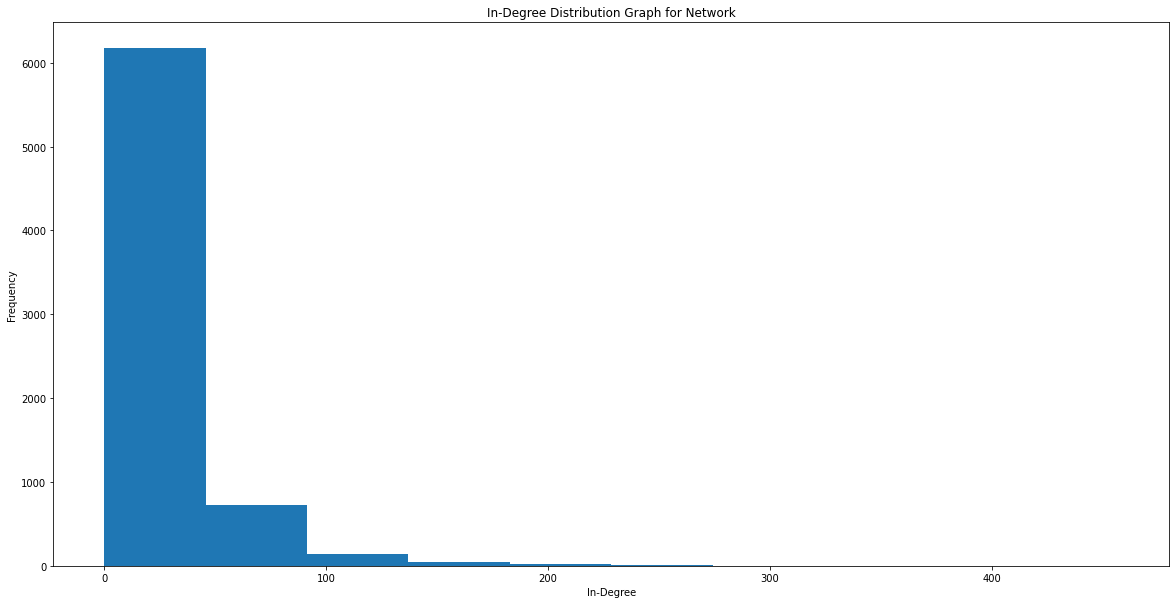

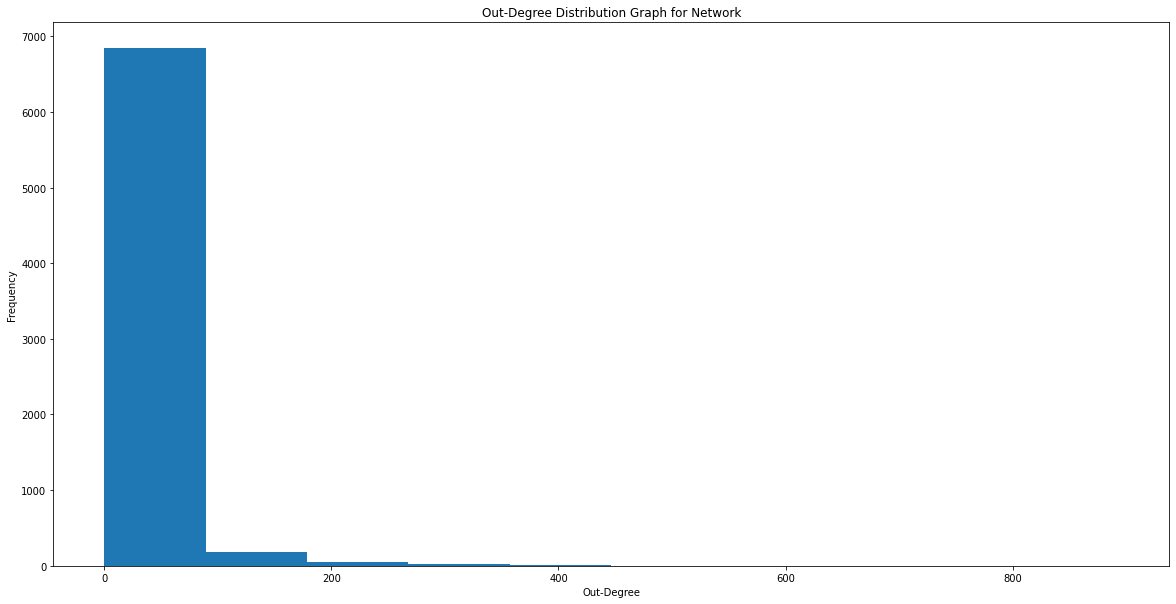

In [152]:
# Plotting In-Degree and Out-Degree Distribution of network

import matplotlib.pyplot as plt

in_degree_freq = list(in_deg.values())
out_degree_freq = list(out_deg.values())

plt.figure(figsize=(20, 10)) 
# plt.loglog(range(len(in_degree_freq)), list(in_deg.values()), 'ro-', label='in-degree') 

plt.hist(in_degree_freq)
plt.xlabel('In-Degree')
plt.ylabel('Frequency')
plt.title('In-Degree Distribution Graph for Network')

plt.figure(figsize=(20, 10)) 
# plt.loglog(range(len(out_degree_freq)), list(out_deg.values()), 'yo-', label='out-degree') 
plt.hist(out_degree_freq)
plt.xlabel('Out-Degree')
plt.ylabel('Frequency')
plt.title('Out-Degree Distribution Graph for Network')

Clustering Coefficient

Text(0.5, 1.0, 'Clustering Coefficient Distribution')

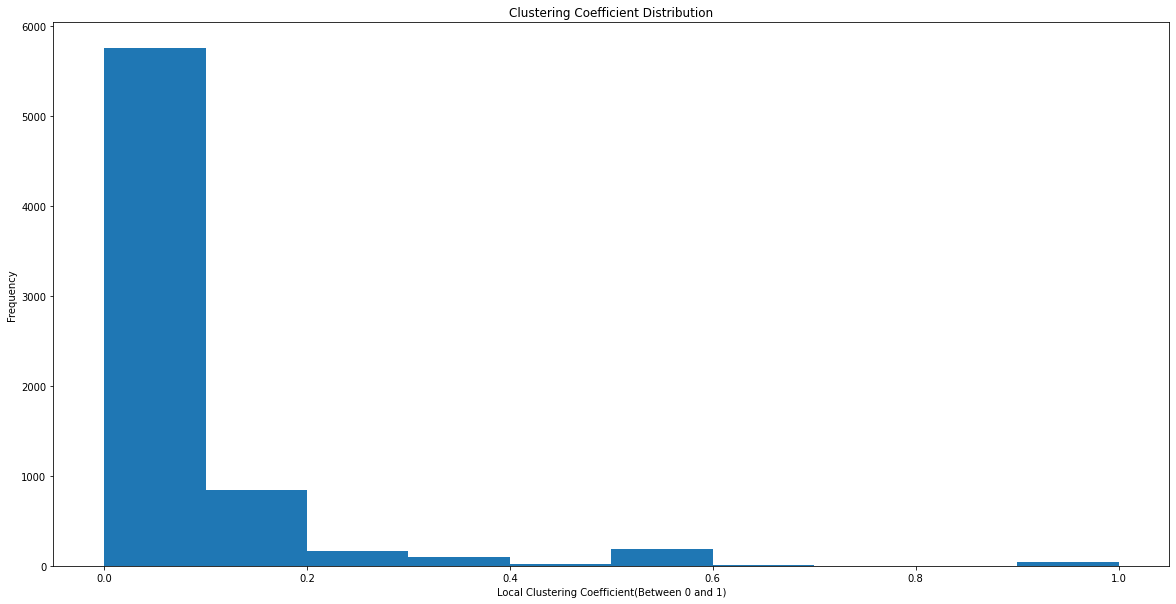

In [153]:
clustering_coeff = []
clustering_coeff_dic={x:0 for x in adj_list}
# For clustering coeff we find out the neighbourhood of node and see which all nodes are connected in neighbourhood
for node in adj_list:
  neigh = adj_list[node]
  degree = len(neigh)
  coeff = 0
  #Checking all points of neighbourhood
  for j in neigh:
    for k in neigh:
      if j!=k and j in adj_list[k]:
        #Adding points which have an edge 
        coeff+=1
  # This is for the case when neighbours are not there or only 1 neighbour
  if degree == 0 or degree == 1:
    clustering_coeff.append(0)
  else:
    #Applying formula, number of connected neighbours divided by total possible outcomes
    clustering_coeff.append((coeff)/(degree*(degree-1)))
    clustering_coeff_dic[node]=(coeff)/(degree*(degree-1))


plt.figure(figsize=(20, 10)) 
# plt.loglog(range(len(clustering_coeff)), clustering_coeff,'go-', label='clustering coefficient') 
plt.hist(clustering_coeff)
plt.xlabel('Local Clustering Coefficient(Between 0 and 1)')
plt.ylabel('Frequency')
plt.title('Clustering Coefficient Distribution')

In [154]:
clustering_coeff_dic

{3: 0.07509881422924901,
 4: 0.13669950738916256,
 5: 0.191699604743083,
 6: 0.030659391432531737,
 7: 0.09239130434782608,
 8: 0.04319713435735535,
 9: 0.05416666666666667,
 10: 0.06757865937072503,
 11: 0.02612160941473519,
 12: 0.051201923076923075,
 13: 0.11818181818181818,
 14: 0.030740568234746156,
 15: 0.06693877551020408,
 16: 0.11904761904761904,
 17: 0.08787878787878788,
 18: 0.12878787878787878,
 19: 0.1106612685560054,
 20: 0.03306307860387557,
 21: 0.030526315789473683,
 22: 0.0,
 23: 0.05368382080710848,
 24: 0.04190308073803219,
 25: 0.10074906367041199,
 26: 0.060582306830907054,
 27: 0.03805086390992041,
 28: 0.05639097744360902,
 29: 0.03923937360178971,
 30: 0.05,
 31: 0.05238095238095238,
 32: 0.0,
 33: 0.09239130434782608,
 34: 0.45,
 35: 0.03461538461538462,
 36: 0.049471755487115514,
 37: 0.06842105263157895,
 38: 0.1043956043956044,
 39: 0.13048780487804879,
 40: 0.09090909090909091,
 41: 0.07241379310344828,
 42: 0.03677221654749745,
 43: 0.08333333333333333,
 